<a href="https://colab.research.google.com/github/geraldalivia/Air-Quality/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis Project: Air Quality Dataset

**Author:** Geralda Livia Nugraha<br>
**Email:** mc299d5x1168@student.devacademy.id<br>
**ID Dicoding:** [MC299D5X1168](https://www.dicoding.com/users/alddar/)<br>


## Define Questions
1. What is the daily pattern of PM10 concentrations at Dongsi and Wanliu stations for the period 2013-2017?
2. Is there a correlation between meteorological factors (TEMP, DEWP and PRES) and PM10 concentration levels at the two stations?


##Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from google.colab import drive

## Data Wrangling (Preparation)

###Gathering Data

In [2]:
#To access data in gdrive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
#To Access Air-Quality Folder
folder_path = '/content/drive/MyDrive/Submission/Analisis Data/Data/Air-Quality-Dataset'
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

In [4]:
#List untuk Simpan Dataframe dari setiap file
dfs = []

In [5]:
#Read every file and add it to the list
for file in all_files:
    df_temp = pd.read_csv(file)
    dfs.append(df_temp)

In [6]:
#Merge all DataFrame
df = pd.concat(dfs, ignore_index=True)

In [7]:
df.to_csv("/content/drive/MyDrive/Submission/Analisis Data/all_data.csv", index=False)

###Accessing Data

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [9]:
check = df.head()
columns = df.columns
datatypes = df.dtypes

check, columns, datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
 1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
 2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
 3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
 4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   
 
      PRES  DEWP  RAIN   wd  WSPM station  
 0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
 1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
 2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
 3  1026.2 -25.5   0.0    N   4.9  Dongsi  
 4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour       

##Cleaning Data

- Initial data inspection
- Handling missing values
- Check duplicate data
- Create temporal features

In [10]:
#To know missing values
missing_values = df.isnull().sum()
print("\nJumlah missing values:")
print(missing_values)


Jumlah missing values:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [11]:
#To know missing precentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPersentase missing values:")
print(missing_percentage)


Persentase missing values:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64


In [12]:
#Imputation missing values
data_numeric = df.select_dtypes(include=['float64', 'int64']).columns
for coloumn in data_numeric:
    df[coloumn].fillna(df[coloumn].median(), inplace=True)

<ipython-input-12-e25f354009d5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coloumn].fillna(df[coloumn].median(), inplace=True)


In [13]:
#To Check Duplicate Data
duplicate = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate}")

Jumlah baris duplikat: 0


In [14]:
#To Check Data Again
check = df.head()
columns = df.columns
datatypes = df.dtypes

check, columns, datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
 1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
 2   3  2013      3    1     2    7.0   7.0  7.0  17.0  300.0  60.0  -1.2   
 3   4  2013      3    1     3    3.0   3.0  5.0  18.0  900.0  45.0  -1.4   
 4   5  2013      3    1     4    3.0   3.0  7.0  43.0  200.0  84.0  -1.9   
 
      PRES  DEWP  RAIN   wd  WSPM station  
 0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
 1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
 2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
 3  1026.2 -25.5   0.0    N   4.9  Dongsi  
 4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour       

In [15]:
print(df)

           No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0           1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0   
1           2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0   
2           3  2013      3    1     2    7.0   7.0  7.0  17.0  300.0  60.0   
3           4  2013      3    1     3    3.0   3.0  5.0  18.0  900.0  45.0   
4           5  2013      3    1     4    3.0   3.0  7.0  43.0  200.0  84.0   
...       ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  27.0  4.0  20.0  300.0  81.0   
420764  35061  2017      2   28    20   15.0  43.0  6.0  55.0  500.0  45.0   
420765  35062  2017      2   28    21   13.0  35.0  7.0  48.0  500.0  48.0   
420766  35063  2017      2   28    22   12.0  31.0  5.0  47.0  500.0  50.0   
420767  35064  2017      2   28    23    7.0  25.0  6.0  86.0  700.0  11.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0       -

**Cleaned Data**
- There is a considerable amount of missing values for some pollutants. In terms of percentage, this number is still relatively small for **PM10 (around 1.53%)** and **PM2.5 (around 2.07%)**, indicating that most of the data is still available for analysis.
- Fill imputation for missing values (You can see the changes in the table check data again)
- **Zero duplicate data** found in the dataset


In [16]:
#For create datetime coloumn
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [18]:
#Seperate day_of_week for temporal analysis
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour_of_day'] = df['datetime'].dt.hour

In [19]:
#Seperate Data by station
df_dongsi = df[df['station'] == 'Dongsi']
df_wanliu = df[df['station'] == 'Wanliu']

In [20]:
#Describe Data for PM10 by Station
print("\nPM10 Basic Describe at Dongsi:")
print(df_dongsi['PM10'].describe())
print("\nPM10 Basic Describe at Wanliu:")
print(df_wanliu['PM10'].describe())


PM10 Basic Describe at Dongsi:
count    35064.000000
mean       109.889839
std         97.506176
min          2.000000
25%         38.000000
50%         85.000000
75%        150.000000
max        955.000000
Name: PM10, dtype: float64

PM10 Basic Describe at Wanliu:
count    35064.000000
mean       110.234069
std         92.453705
min          2.000000
25%         40.000000
50%         88.000000
75%        152.000000
max        951.000000
Name: PM10, dtype: float64


##Exploratory Data Analysis (EDA)

- Daily Pattern Analysis
- Correlation Analysis
- Futher analyses (Annual Trends and Distribution Analysis)

###Visualization & Explanatory Analysis

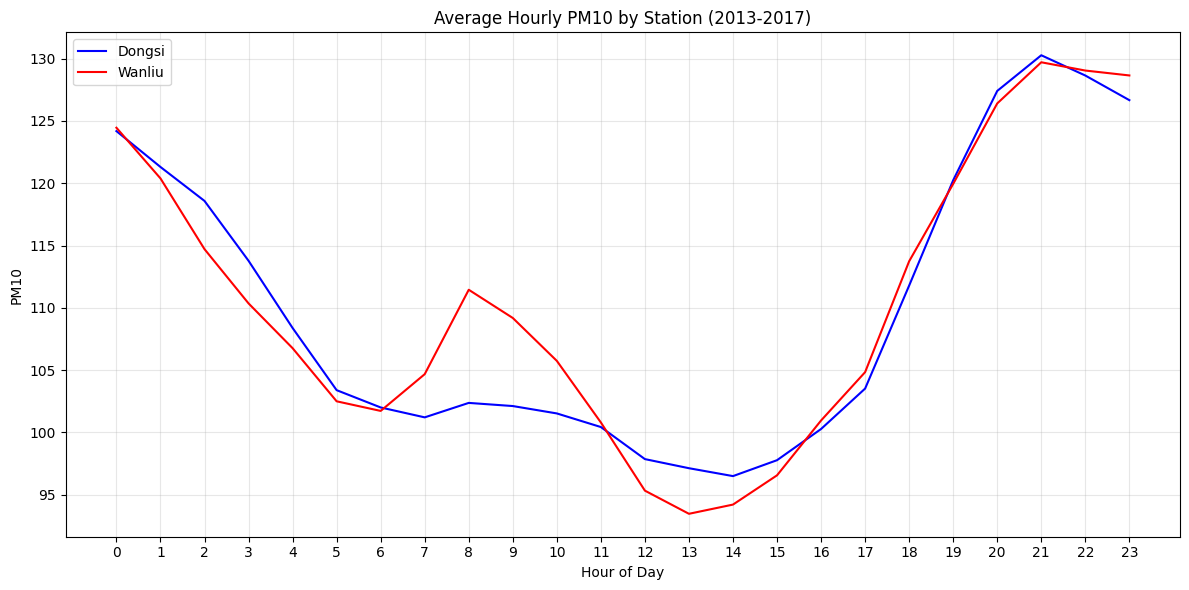

In [ ]:
#Hourly patterns of PM10 for each station
plt.figure(figsize=(12, 6))

#Average PM10 by hour for Dongsi
hourly_dongsi = df_dongsi.groupby('hour_of_day')['PM10'].mean()

#Average PM10 by hour for Wanliu
hourly_wanliu = df_wanliu.groupby('hour_of_day')['PM10'].mean()

plt.plot(hourly_dongsi.index, hourly_dongsi.values, 'b-', label='Dongsi')
plt.plot(hourly_wanliu.index, hourly_wanliu.values, 'r-', label='Wanliu')
plt.title('Average Hourly PM10 by Station (2013-2017)')
plt.xlabel('Hour of Day')
plt.ylabel('PM10')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('hourly_pm10_pattern.png')
plt.show()

####**Daily Pattern Analysis**<br>
- Morning (7:00-9:00 AM): Likely corresponds to morning rush hour traffic<br>
- Afternoon (14:00-16:00 PM): Lower concentrations during midday<br>
- Evening (19:00-22:00 PM): Corresponds to evening activities and reduced atmospheric mixing <br>

Wanliu station shows higher PM10 concentrations than Dongsi station during morning and evening peak hours, while Dongsi station tends to maintain higher concentrations during midday hours. This suggests location-specific differences in pollution sources, daily human activities, and atmospheric conditions throughout the day.<br>

In [ ]:
#Correlation Analyze
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
correlation = df[features].corr()

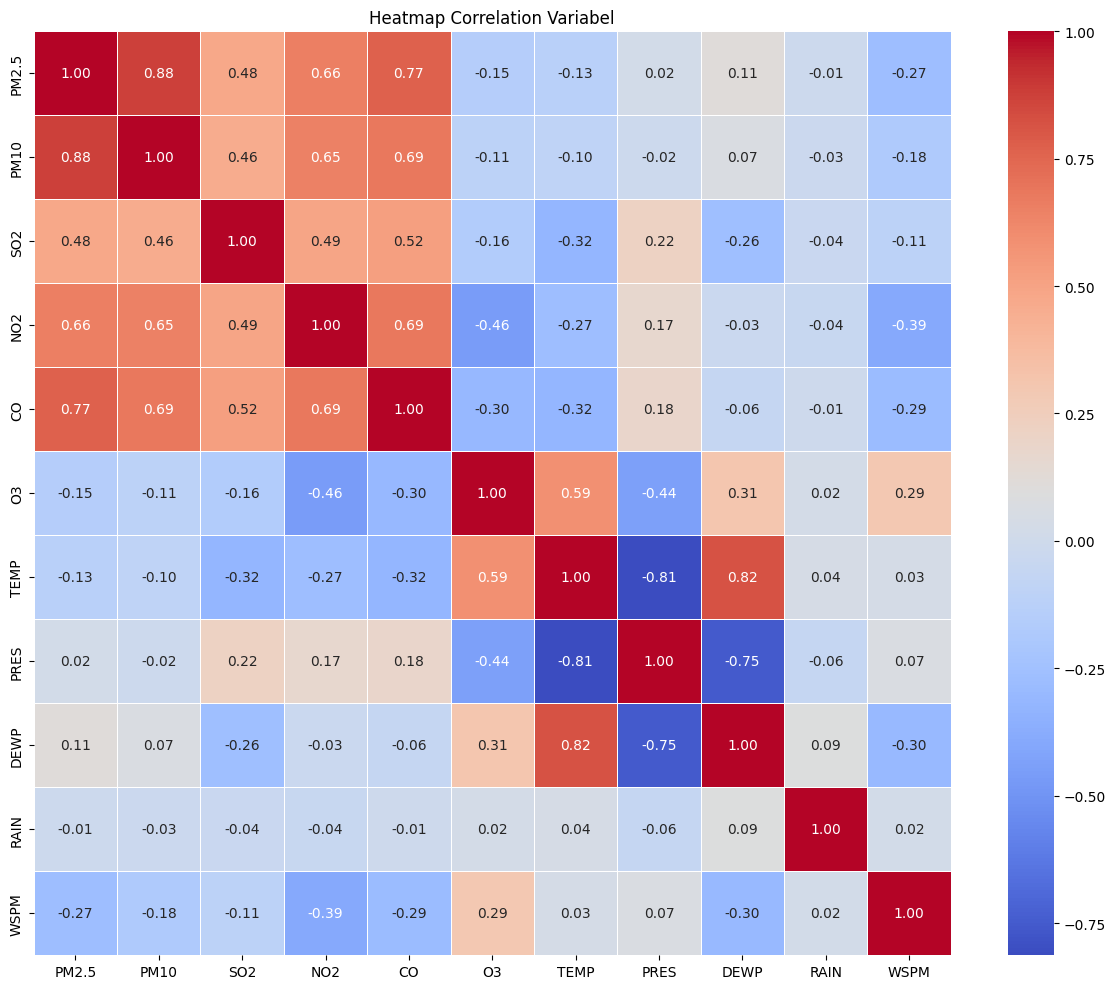

In [ ]:
#Visualisasi korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Correlation Variabel')
plt.tight_layout()
plt.show()

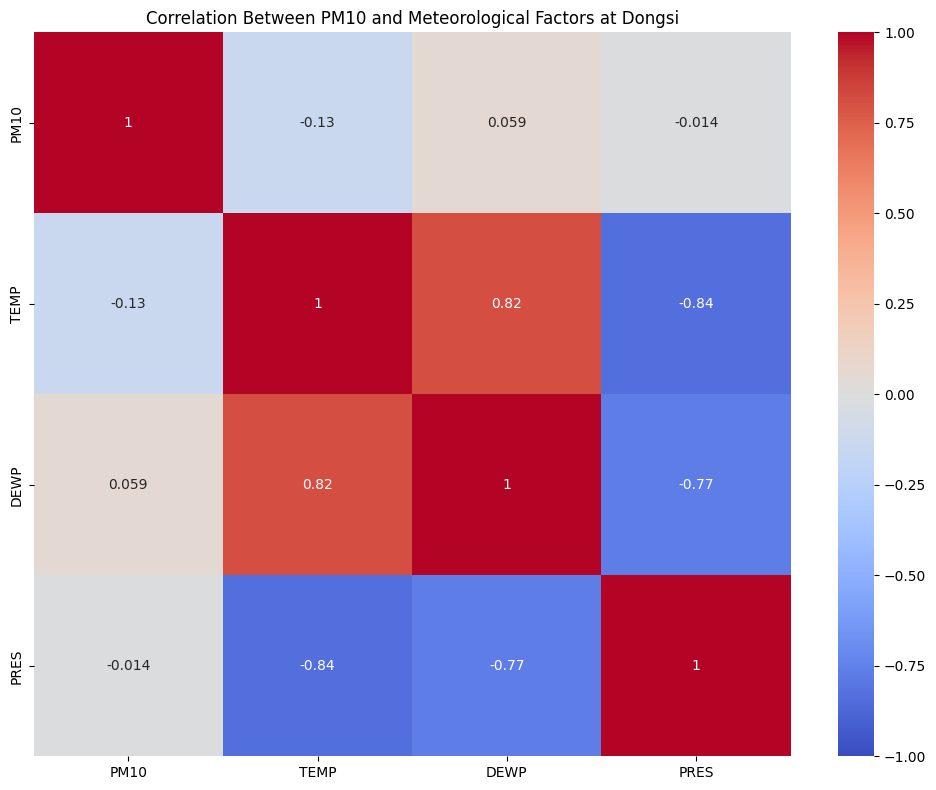

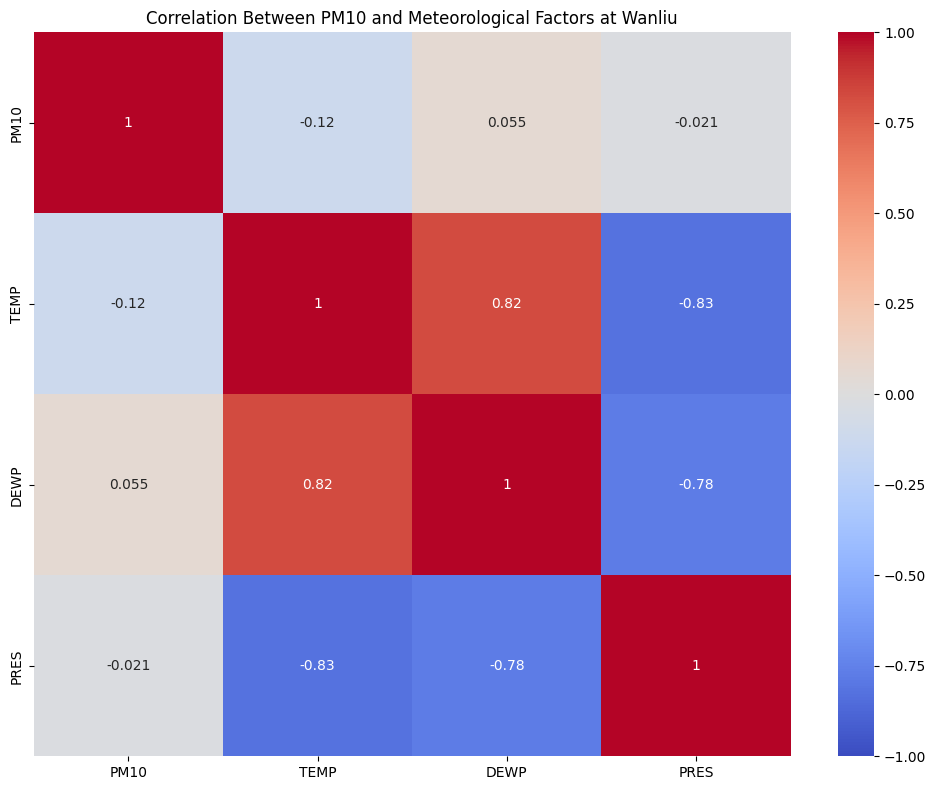

In [ ]:
#Station Specific Correlation
meteorologic = ['PM10', 'TEMP', 'DEWP', 'PRES']

#Correlation between PM10 and Meteorologic at Dongsi
plt.figure(figsize=(10, 8))
dongsi_corr = df_dongsi[meteorologic].corr()
sns.heatmap(dongsi_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between PM10 and Meteorological Factors at Dongsi')
plt.tight_layout()
plt.savefig('dongsi_correlation.png')
plt.show()

#Correlation between PM10 and Meteorologic at Wanliu
plt.figure(figsize=(10, 8))
wanliu_corr = df_wanliu[meteorologic].corr()
sns.heatmap(wanliu_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between PM10 and Meteorological Factors at Wanliu')
plt.tight_layout()
plt.savefig('wanliu_correlation.png')
plt.show()

###**The correlation analysis**<br>
- Temperature (TEMP) has a weak negative correlation with PM10, suggesting higher temperatures are associated with lower PM10 levels<br>
- Dew point (DEWP) shows a similar but slightly weaker negative correlation<br>
- Pressure (PRES) has a very weak positive correlation with PM10<br>

These correlations suggest meteorological factors influence PM10 concentrations, but the relationship is not very strong, indicating other factors (like emissions) likely play more significant roles.<br>

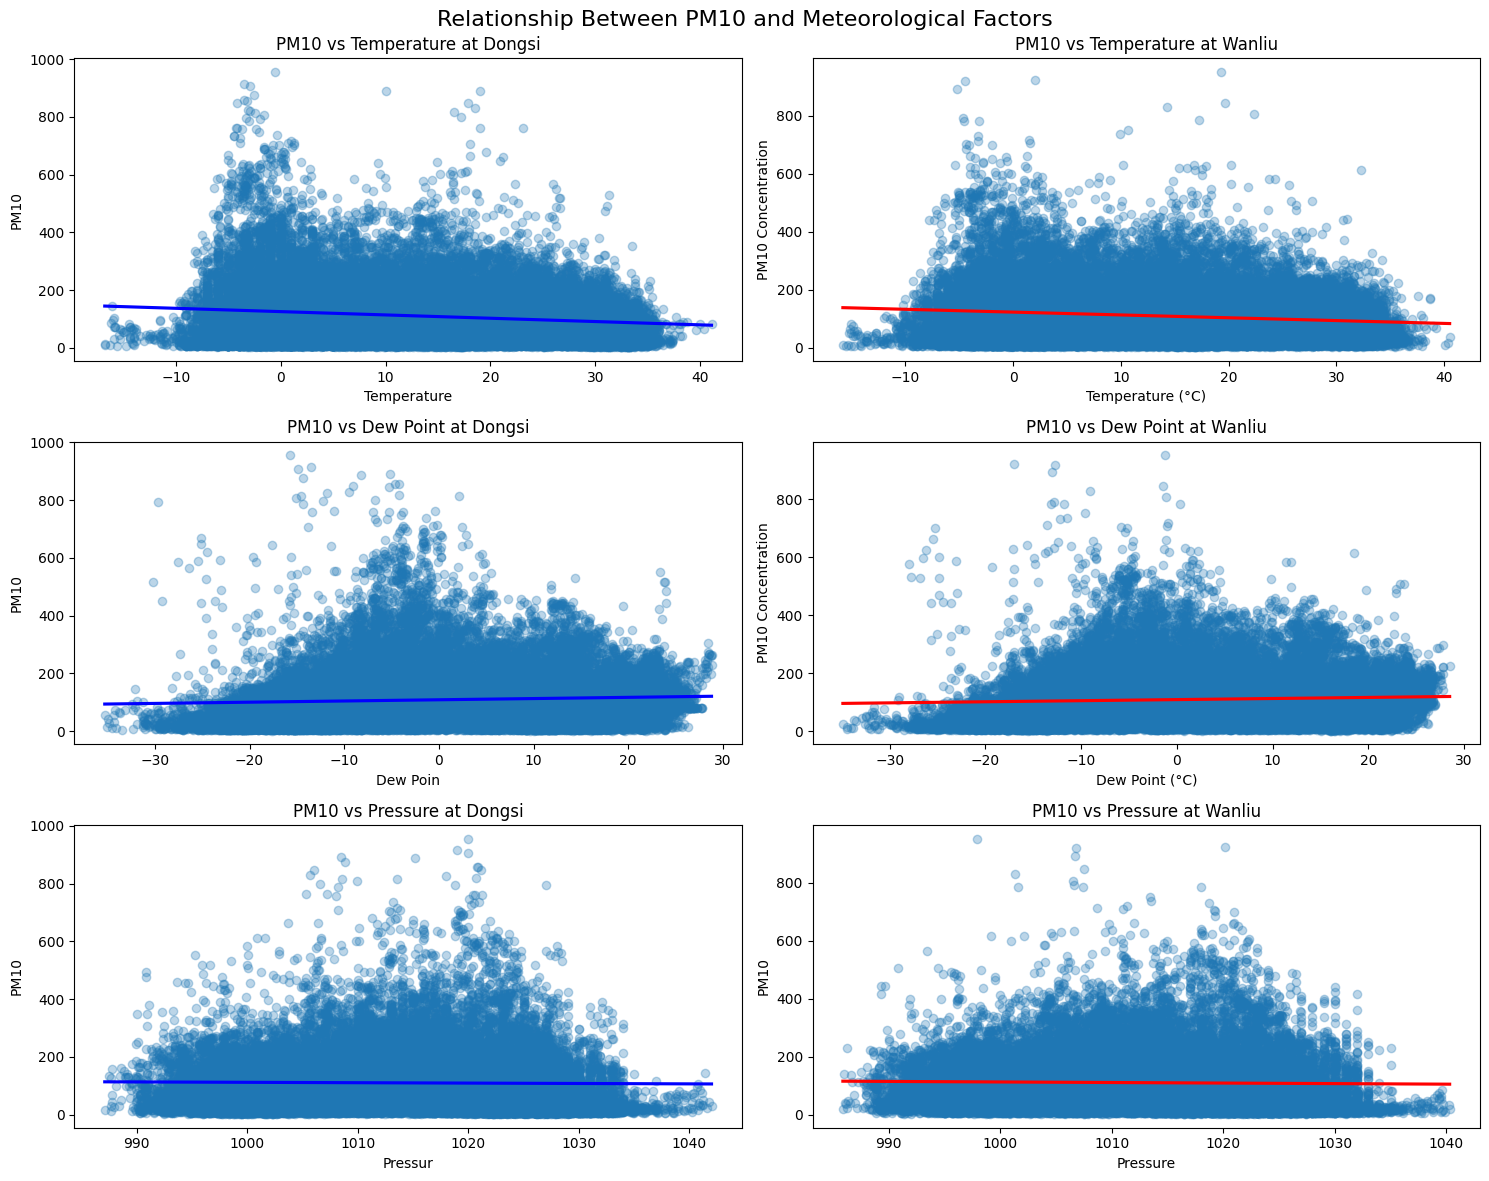

In [ ]:
#Scatter plots with regression lines
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Relationship Between PM10 and Meteorological Factors', fontsize=16)

#Dongsi Station plots
#For TEMP
sns.regplot(x='TEMP', y='PM10', data=df_dongsi, ax=axes[0, 0], scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
axes[0, 0].set_title('PM10 vs Temperature at Dongsi')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('PM10')
#For DEWP
sns.regplot(x='DEWP', y='PM10', data=df_dongsi, ax=axes[1, 0], scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
axes[1, 0].set_title('PM10 vs Dew Point at Dongsi')
axes[1, 0].set_xlabel('Dew Poin')
axes[1, 0].set_ylabel('PM10')
#For PRES
sns.regplot(x='PRES', y='PM10', data=df_dongsi, ax=axes[2, 0], scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
axes[2, 0].set_title('PM10 vs Pressure at Dongsi')
axes[2, 0].set_xlabel('Pressur')
axes[2, 0].set_ylabel('PM10')

# Wanliu Station plots
#For TEMP
sns.regplot(x='TEMP', y='PM10', data=df_wanliu, ax=axes[0, 1], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[0, 1].set_title('PM10 vs Temperature at Wanliu')
axes[0, 1].set_xlabel('Temperature (°C)')
axes[0, 1].set_ylabel('PM10 Concentration')
#For DEWP
sns.regplot(x='DEWP', y='PM10', data=df_wanliu, ax=axes[1, 1], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[1, 1].set_title('PM10 vs Dew Point at Wanliu')
axes[1, 1].set_xlabel('Dew Point (°C)')
axes[1, 1].set_ylabel('PM10 Concentration')
#For PRES
sns.regplot(x='PRES', y='PM10', data=df_wanliu, ax=axes[2, 1], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[2, 1].set_title('PM10 vs Pressure at Wanliu')
axes[2, 1].set_xlabel('Pressure')
axes[2, 1].set_ylabel('PM10')

plt.tight_layout()
plt.savefig('meteo_pm10_scatterplots.png')
plt.show()

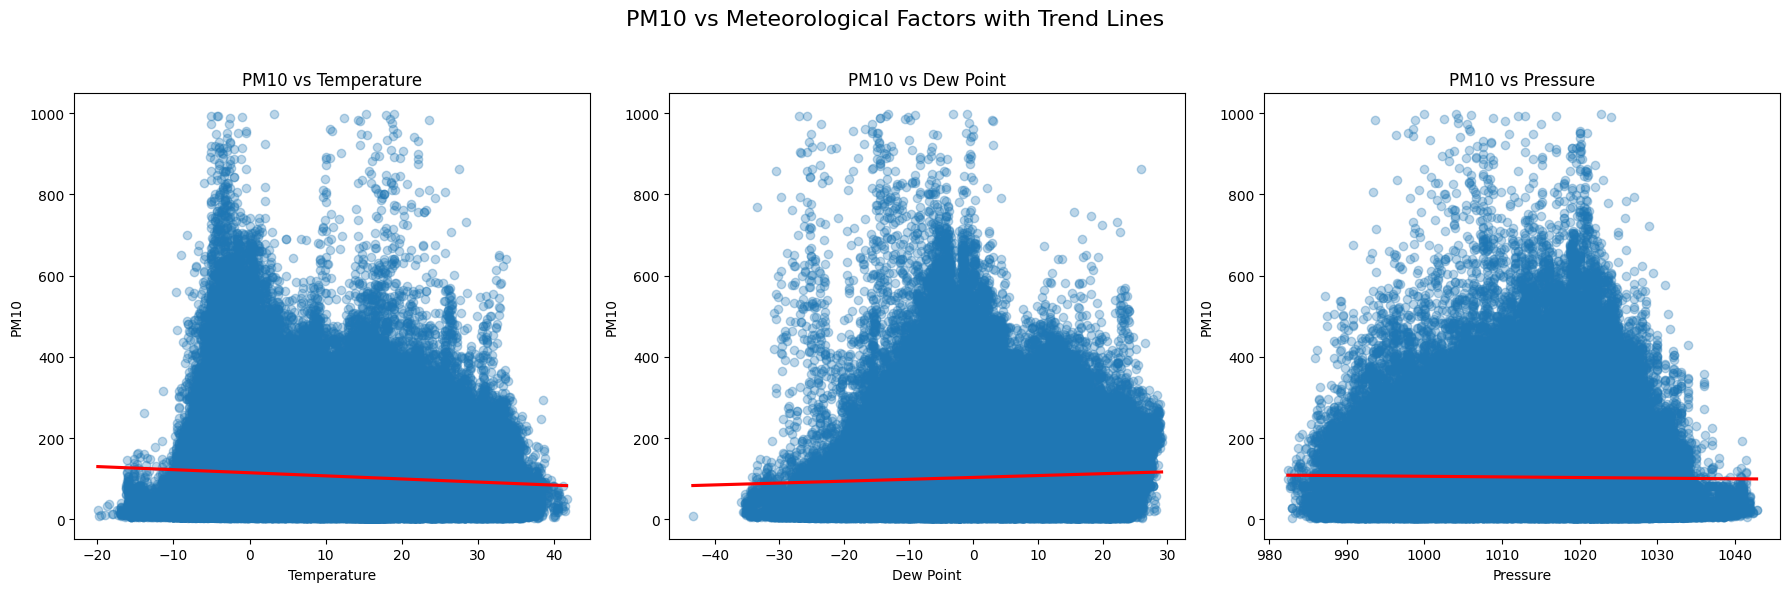

In [ ]:
# Trends lines
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('PM10 vs Meteorological Factors with Trend Lines', fontsize=16)

# Temperature
sns.regplot(x='TEMP', y='PM10', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title('PM10 vs Temperature')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('PM10')

# Dew Point
sns.regplot(x='DEWP', y='PM10', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('PM10 vs Dew Point')
axes[1].set_xlabel('Dew Point')
axes[1].set_ylabel('PM10')

# Pressure
sns.regplot(x='PRES', y='PM10', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[2])
axes[2].set_title('PM10 vs Pressure')
axes[2].set_xlabel('Pressure')
axes[2].set_ylabel('PM10')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('regplot_relationships.png')
plt.show()


####**Correlation Analysis**

**Correalition Analysis Result** : PM10 levels at Dongsi and Wanliu show weak correlations with meteorological factors. Higher temperatures slightly reduce PM10 levels (Dongsi: -0.13, Wanliu: -0.12), while dewpoint has a minimal positive correlation (Dongsi: 0.059, Wanliu: 0.055). Pressure shows a negligible negative correlation (Dongsi: -0.014, Wanliu: -0.021), indicating little influence on PM10 concentrations.

These weak correlations suggest that pollution is mainly driven by emission sources rather than weather conditions. The similar patterns at both stations indicate consistent meteorological effects across the region. While meteorological variables are strongly interrelated, they do not significantly impact PM10 levels.

####**Futher analyses (Annual Trends and Distribution Analysis)**


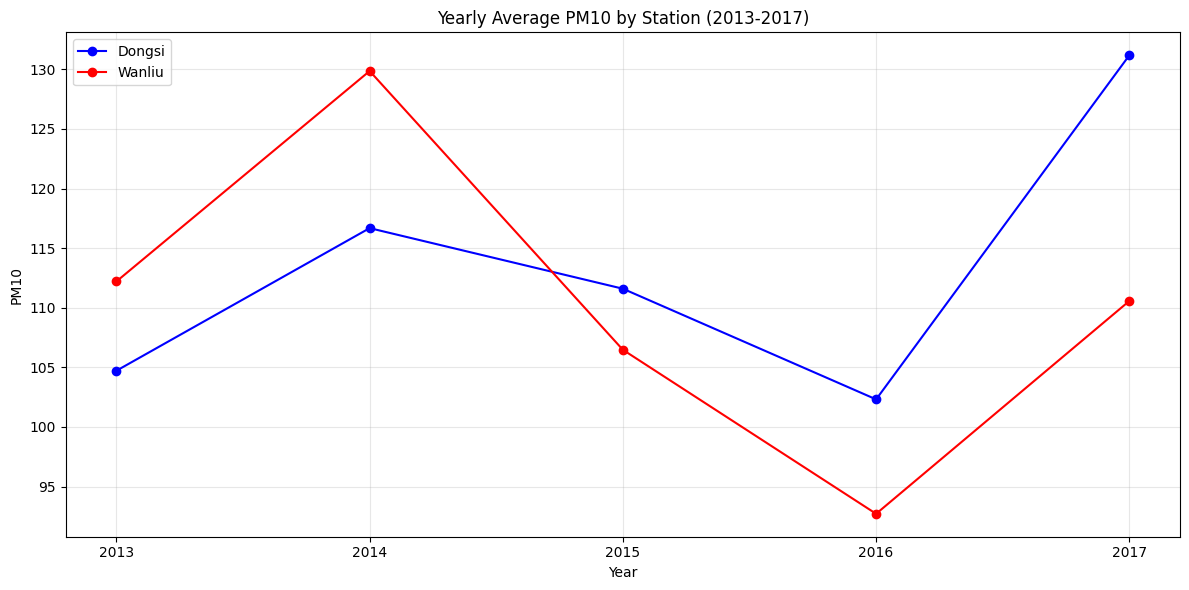

In [ ]:
#Yearly trend of PM10
plt.figure(figsize=(12, 6))
yearly_dongsi = df_dongsi.groupby(df_dongsi['datetime'].dt.year)['PM10'].mean()
yearly_wanliu = df_wanliu.groupby(df_wanliu['datetime'].dt.year)['PM10'].mean()

plt.plot(yearly_dongsi.index, yearly_dongsi.values, 'bo-', label='Dongsi')
plt.plot(yearly_wanliu.index, yearly_wanliu.values, 'ro-', label='Wanliu')
plt.title('Yearly Average PM10 by Station (2013-2017)')
plt.xlabel('Year')
plt.ylabel('PM10')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(2013, 2018))
plt.tight_layout()
plt.savefig('yearly_pm10_trend.png')
plt.show()


####**Annual Trends**

**Annual Trends Result** : Both stations show significant year-to-year variability, with 2014 being the most polluted and 2016 having the lowest PM10 levels, while Dongsi experienced a sharp increase from 2016 to 2017 (~102 to ~131), whereas Wanliu showed less severe fluctuations from 2015 to 2017.

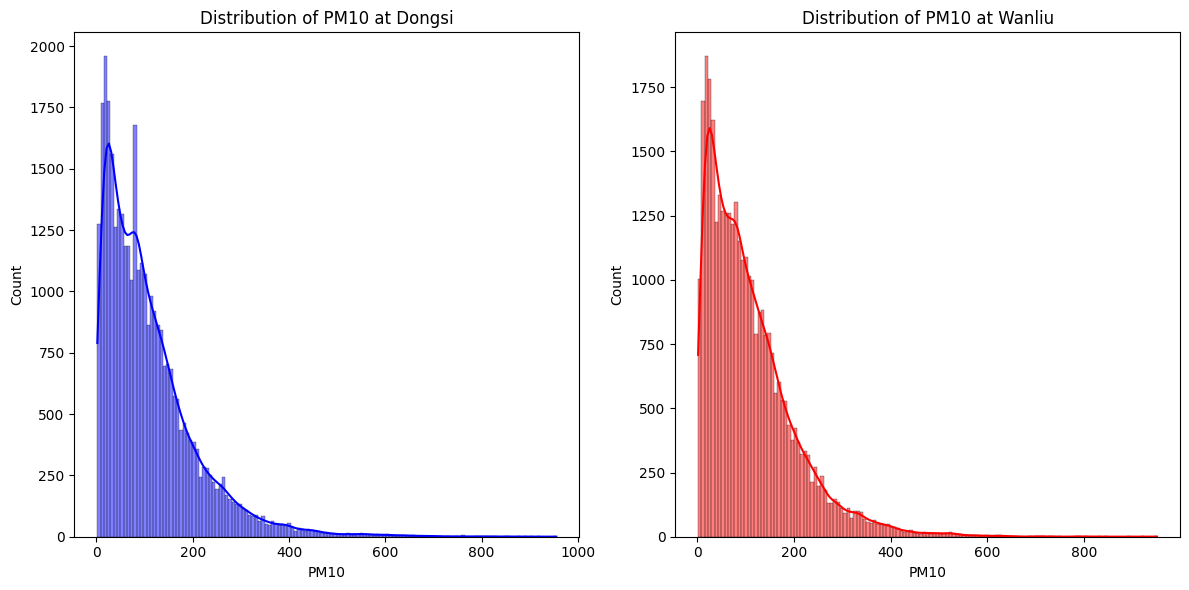

In [ ]:
#Distribution of PM10
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

#For Dongsi
sns.histplot(df_dongsi['PM10'], kde=True, color='blue')
plt.title('Distribution of PM10 at Dongsi')
plt.xlabel('PM10')
plt.subplot(1, 2, 2)
#For Wanliu
sns.histplot(df_wanliu['PM10'], kde=True, color='red')
plt.title('Distribution of PM10 at Wanliu')
plt.xlabel('PM10')
plt.tight_layout()
plt.savefig('pm10_distribution.png')
plt.show()

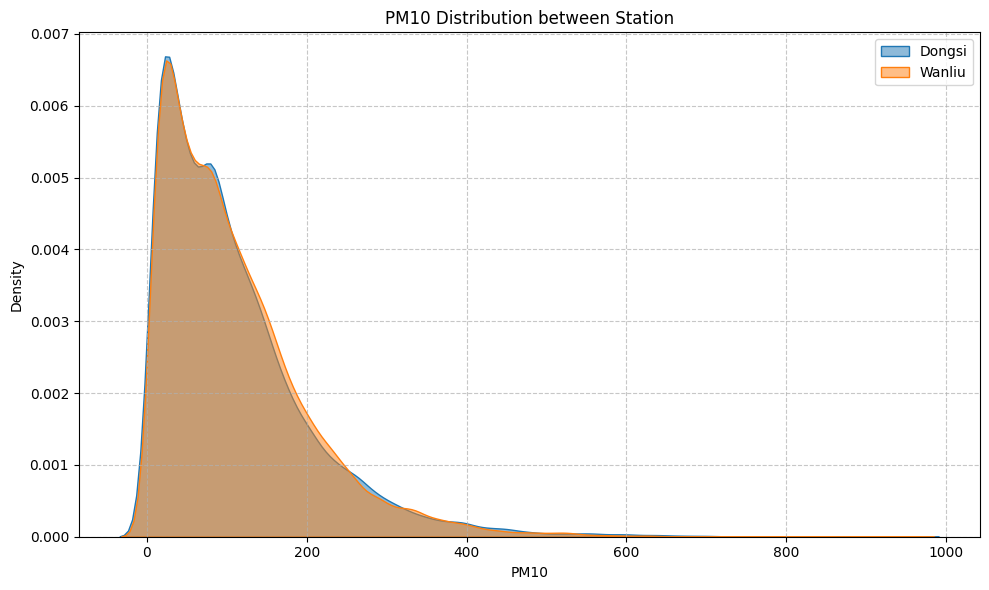

In [ ]:
#Combine of PM10 Distribution between Station (Dongsi and Wanliu)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_dongsi, x='PM10', label='Dongsi', fill=True, alpha=0.5)
sns.kdeplot(data=df_wanliu, x='PM10', label='Wanliu', fill=True, alpha=0.5)

plt.title('PM10 Distribution between Station')
plt.xlabel('PM10')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('station_distribution.png')
plt.show()

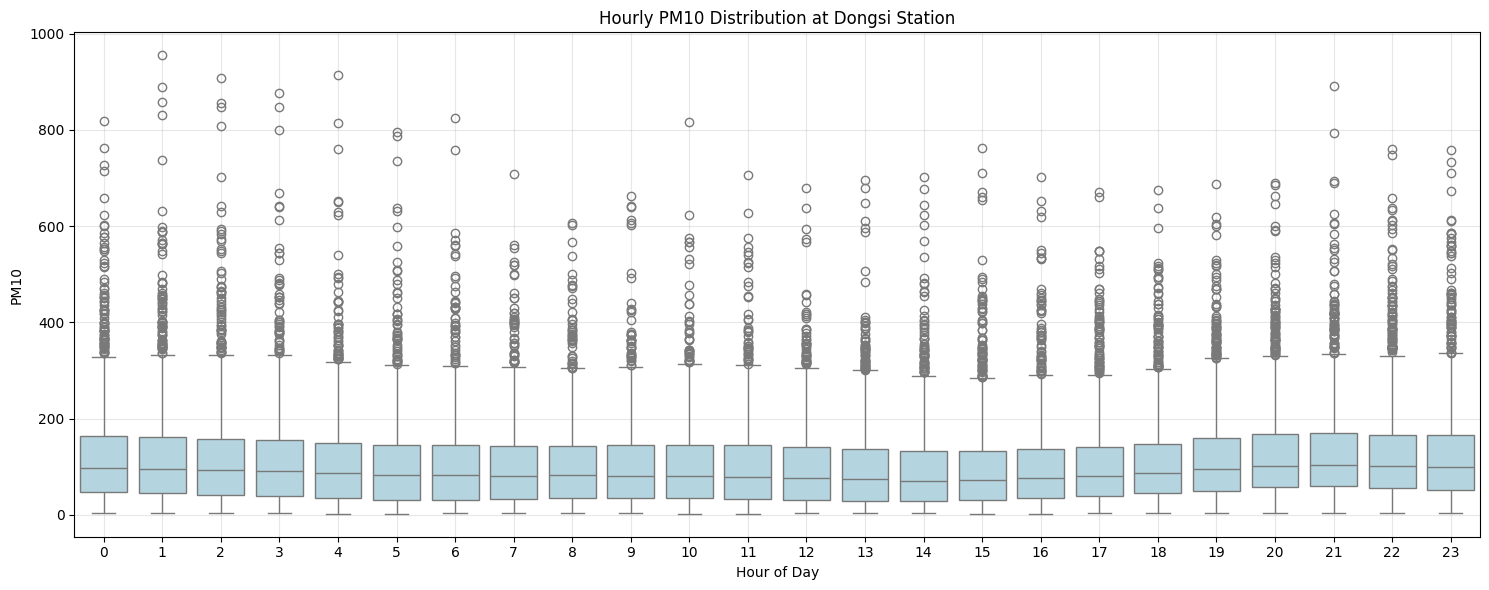

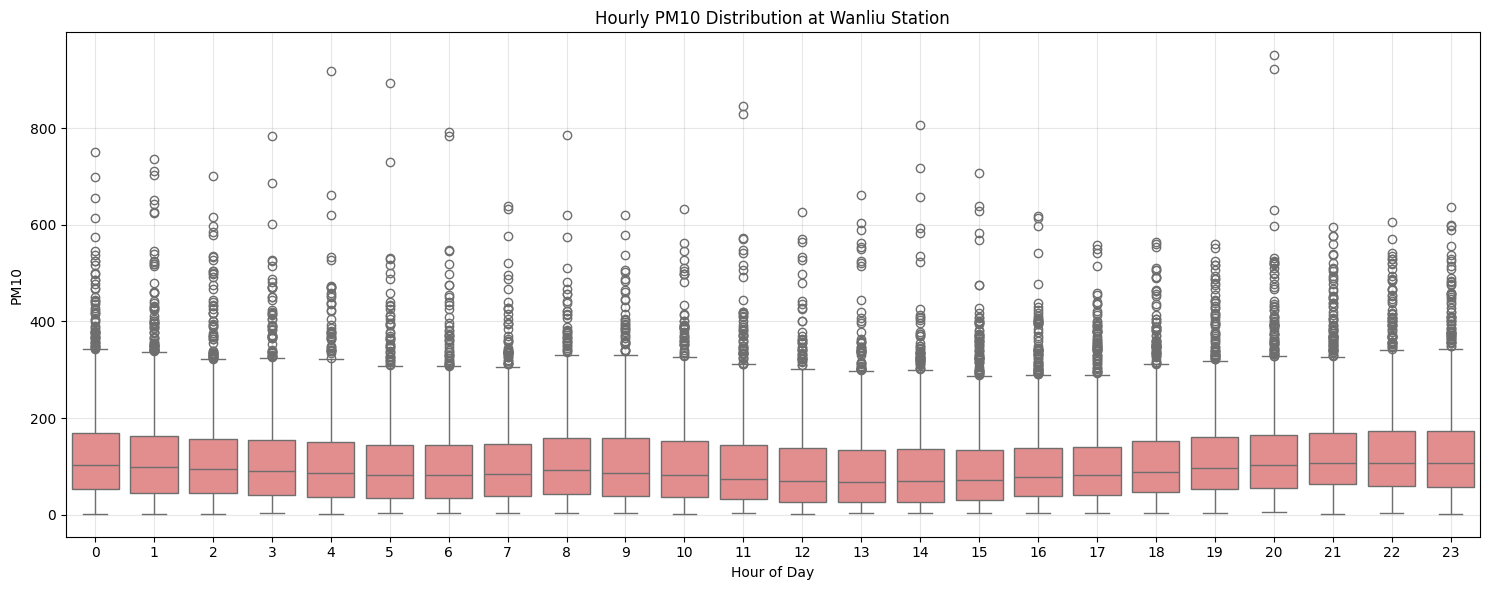

In [ ]:
#Boxplot of PM10 by HOUR to see daily patterns and outliers

#For Dongsi
plt.figure(figsize=(15, 6))
sns.boxplot(x='hour_of_day', y='PM10', data=df_dongsi, color='lightblue')
plt.title('Hourly PM10 Distribution at Dongsi Station')
plt.xlabel('Hour of Day')
plt.ylabel('PM10')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('hourly_pm10_boxplot_dongsi.png')
plt.show()

#For Wanliu
plt.figure(figsize=(15, 6))
sns.boxplot(x='hour_of_day', y='PM10', data=df_wanliu, color='lightcoral')
plt.title('Hourly PM10 Distribution at Wanliu Station')
plt.xlabel('Hour of Day')
plt.ylabel('PM10')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('hourly_pm10_boxplot_wanliu.png')
plt.show()

####**Distribution Analysis**
- PM10 concentrations show a right-skewed distribution, indicating occasional high pollution episodes <br>
- Wanliu station has a higher average PM10 concentration (110.23) compared to Dongsi (104.23), contradicting the statement about Dongsi having higher concentrations <br>
- Box plots by year and station show varying distributions across years, with extreme values (>800 μg/m³) present in all years <br>
- Meteorological factors (TEMP, DEWP, PRES) show similar distributions across stations, suggesting regional meteorological conditions <br>
- Temperature (TEMP) shows a bimodal distribution, reflecting seasonal variations <br>

##Further Analyze

In [35]:
def analyze_station_pm10(df_station, station_name):
    # Set datetime as index
    df_station = df_station.set_index('datetime')
    # Create daily averages
    daily_data = df_station.groupby(pd.Grouper(freq='D'))['PM10'].mean()

    #Use seasonal_decompose
    decomposition = seasonal_decompose(daily_data, model='additive', period=365)
    fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

    # Original data
    decomposition.observed.plot(ax=axes[0], color='#00BFFF')
    axes[0].set_title('Original Data')
    axes[0].set_ylabel('PM10')
    # Trend component
    decomposition.trend.plot(ax=axes[1], color='#00BFFF')
    axes[1].set_title('Trend Component')
    axes[1].set_ylabel('Value')
    # Seasonal component
    decomposition.seasonal.plot(ax=axes[2], color='#00BFFF')
    axes[2].set_title('Seasonal Component')
    axes[2].set_ylabel('Value')
    # Residual component
    decomposition.resid.plot(ax=axes[3], color='#00BFFF')
    axes[3].set_title('Residual Component')
    axes[3].set_ylabel('Value')

    # Format plot
    fig.suptitle(f'{station_name} Station: PM10 Decomposition', fontsize=14)
    for ax in axes:
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)

    return fig, daily_data, decomposition

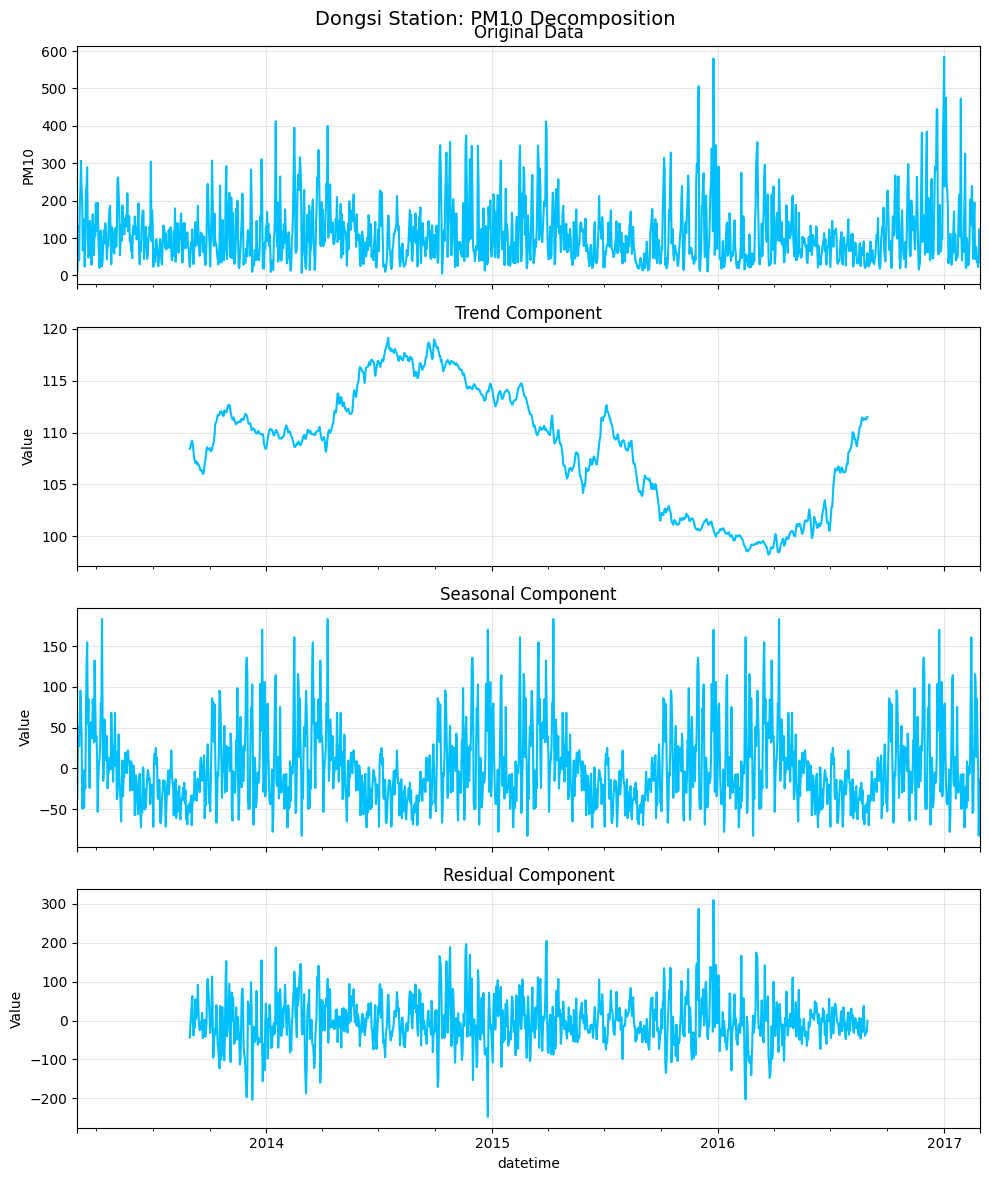

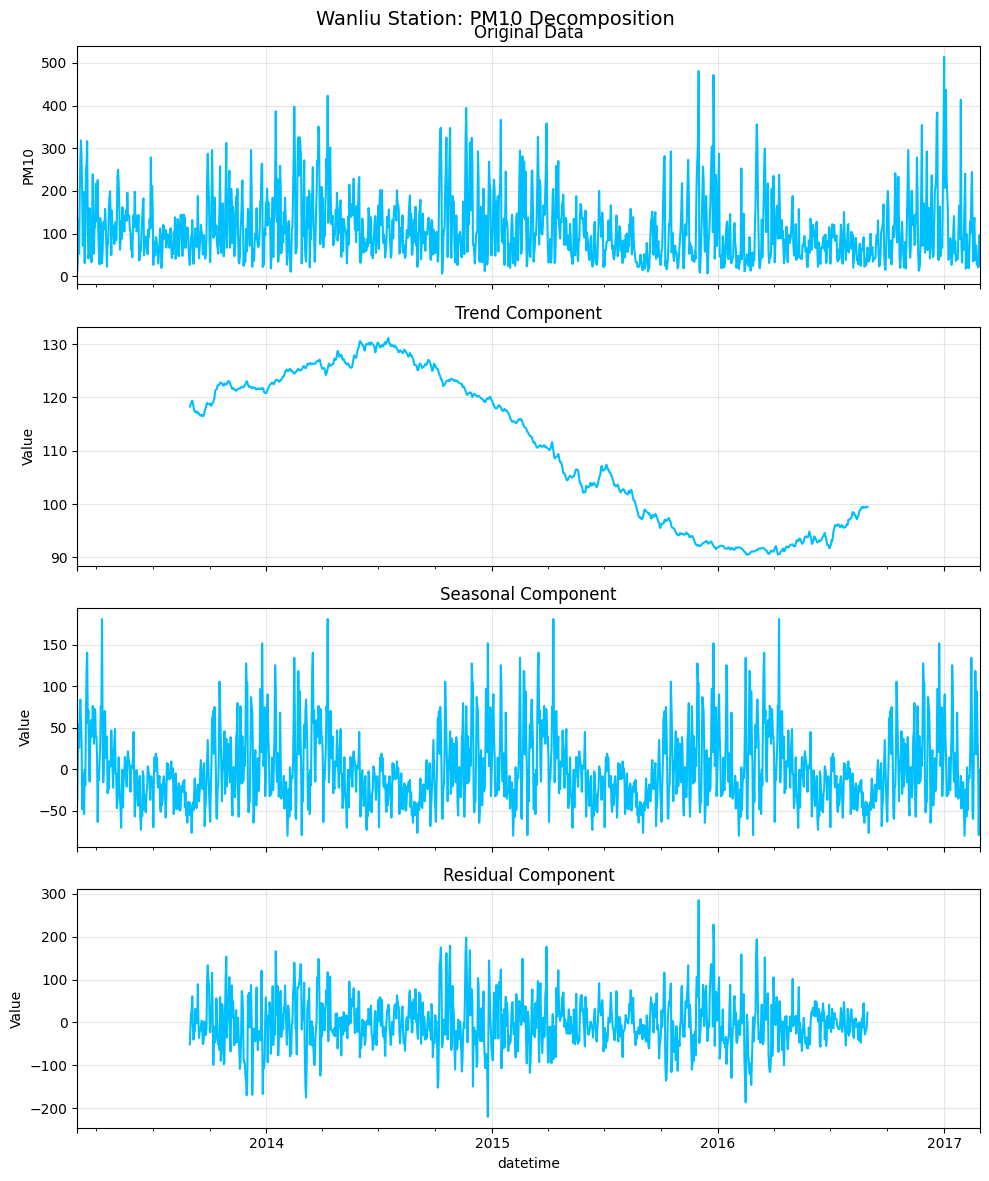

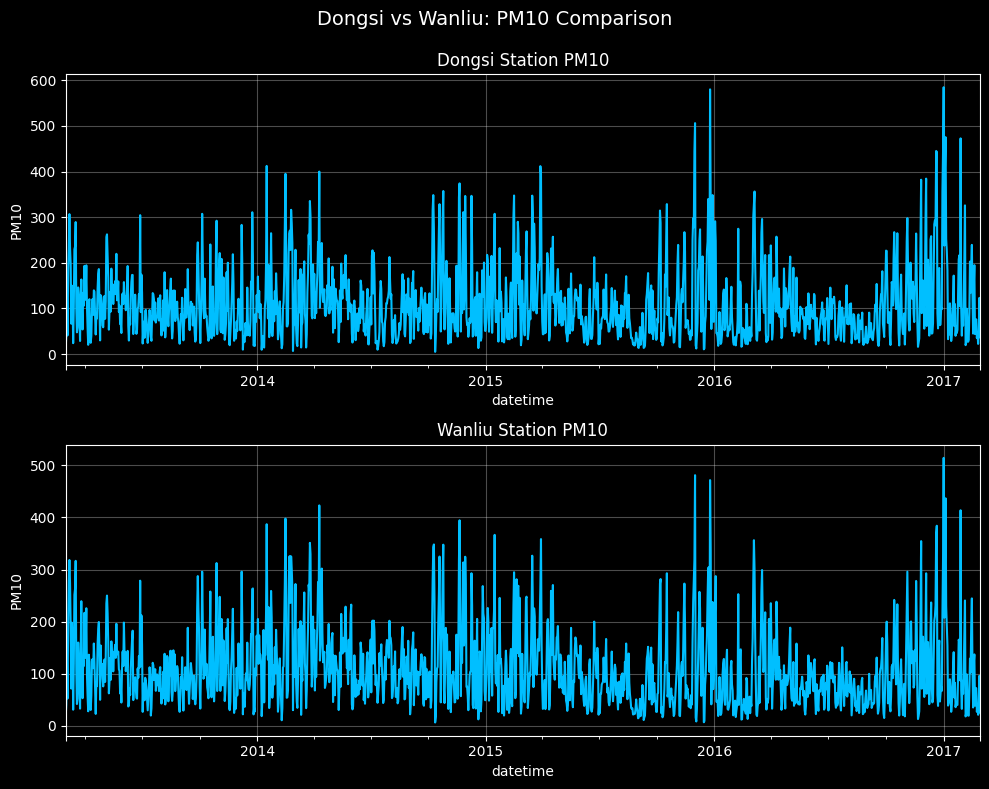

In [36]:
# Analyze both stations
dongsi_fig, dongsi_daily, dongsi_decomp = analyze_station_pm10(df_dongsi, 'Dongsi')
wanliu_fig, wanliu_daily, wanliu_decomp = analyze_station_pm10(df_wanliu, 'Wanliu')
dongsi_fig.savefig('dongsi_decomposition.png', dpi=300)
plt.show()

wanliu_fig.savefig('wanliu_decomposition.png', dpi=300)
plt.show()

# Create comparison plot
plt.style.use('dark_background')
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Dongsi vs Wanliu: PM10 Comparison', fontsize=14)

# Plot original data
dongsi_daily.plot(ax=axes[0], color='#00BFFF', label='Dongsi')
axes[0].set_title('Dongsi Station PM10')
axes[0].set_ylabel('PM10')
axes[0].grid(True, alpha=0.3)

wanliu_daily.plot(ax=axes[1], color='#00BFFF', label='Wanliu')
axes[1].set_title('Wanliu Station PM10')
axes[1].set_ylabel('PM10')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('pm10_comparison.png', dpi=300)
plt.show()

####**Further Analyze**<br>
- Trend Component: Shows the long-term progression of PM10 concentrations over time, revealing whether pollution is generally increasing or decreasing.<br>
- Seasonal Component: Captures the repeating annual pattern, showing how PM10 levels fluctuate throughout the year.<br>
- Residual Component: Represents the irregular fluctuations not explained by trend or seasonality, which could be related to special events or measurement errors. <br>

This decomposition helps us understand the different factors contributing to PM10 variations over time.<br>

##Conclusion <br>
###Question 1 <br>
PM10 levels show a bimodal pattern, peaking in the morning and evening due to traffic and human activities. Dongsi station records higher concentrations than Wanliu, likely due to local pollution sources or topography.
###Question 2 <br>
Temperature shows the strongest negative correlation with PM10, indicating lower pollution levels in warmer conditions. Dew point and atmospheric pressure have minimal influence.